In [ ]:
!pip install tensorflow tensorflow-hub librosa sounddevice pandas


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving police-siren-99029.mp3 to police-siren-99029.mp3


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
import librosa

# Load YAMNet model
yamnet_model = hub.load('https://tfhub.dev/google/yamnet/1')

# Load class labels
labels_url = 'https://raw.githubusercontent.com/tensorflow/models/master/research/audioset/yamnet/yamnet_class_map.csv'
df = pd.read_csv(labels_url)
class_names = df['display_name'].tolist()


In [ ]:
# Get uploaded file name
file_name = list(uploaded.keys())[0]

# Load audio using librosa
waveform, sr = librosa.load(file_name, sr=16000)
waveform = waveform.astype(np.float32)

# Run YAMNet inference
scores, embeddings, spectrogram = yamnet_model(waveform)

# Get average score across time
mean_scores = np.mean(scores, axis=0)

# Get top 10 predictions
top_n = 10
top_indices = np.argsort(mean_scores)[::-1][:top_n]

print("🔍 Top detected sounds:")
for i in top_indices:
    print(f"{class_names[i]}: {mean_scores[i]:.3f}")


🔍 Top detected sounds:
Siren: 0.384
Police car (siren): 0.346
Alarm: 0.320
Sound effect: 0.184
Emergency vehicle: 0.056
Ambulance (siren): 0.040
Music: 0.035
Synthesizer: 0.028
Motor vehicle (road): 0.025
Car alarm: 0.023


In [ ]:
emergency_keywords = ['siren', 'alarm', 'gunshot', 'scream', 'explosion', 'glass', 'crash']
emergency_indices = [i for i, name in enumerate(class_names) if any(k in name.lower() for k in emergency_keywords)]

print("\n🚨 Emergency sounds detected:")
found = False
for i in emergency_indices:
    if mean_scores[i] > 0.1:
        print(f"{class_names[i]}: {mean_scores[i]:.2f}")
        found = True

if not found:
    print("None detected.")



🚨 Emergency sounds detected:
Police car (siren): 0.35
Alarm: 0.32
Siren: 0.38


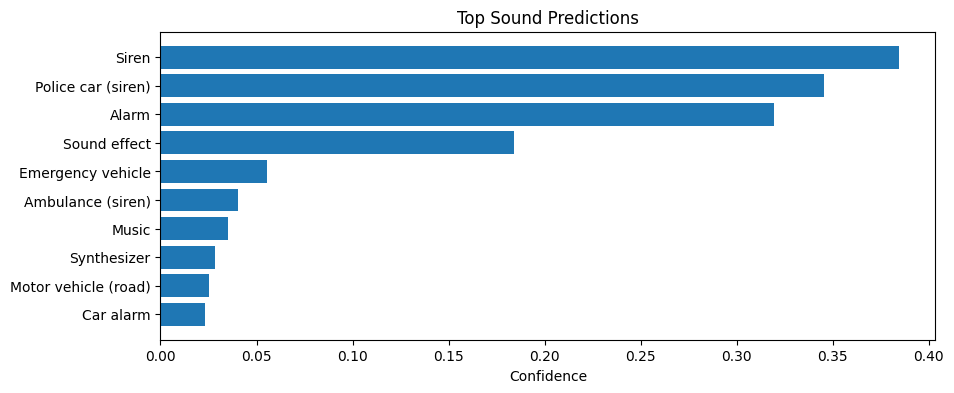

In [ ]:
import matplotlib.pyplot as plt

top_indices = np.argsort(mean_scores)[::-1][:10]
top_labels = [class_names[i] for i in top_indices]
top_probs = [mean_scores[i] for i in top_indices]

plt.figure(figsize=(10, 4))
plt.barh(top_labels[::-1], top_probs[::-1])
plt.xlabel("Confidence")
plt.title("Top Sound Predictions")
plt.show()